#  Data Mining ISM6136 - Final project
## Group - Elite

### Members:
1. Rahul Reddy Vemparala  - U79474665
2. Nihar Reddy Lonka - U60570876
3. Sreeja  Katanguri - U89168040
4. Vineeth Lanka - U60221702
5. Akhila Siddabatula - U73439960
6. Kavya Reddy Basupalli - U22892161

# Source dataset: Breast Cancer Trial Data of Wisconsin city
## Source information: 
The source data is sampled clinical trial findings for the Wisconsin city. The findinds dataset contains the test results of a popular biposy technique called (FNA)Fine Needle Aspirate.

resource: UCI ML repository: [reference link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)


# Business problem: 
1. Some times the biposy result might indicate a tumor to be Benign(Harmless) but later this tumor may split and spread infecting internal tissues, i.e. turning into a Malignant tumor(Harmful). 
2. Hence, we need a predictive model ,that could understand the biopsy(FNA) result and predict if a tumor could actual be Malignant(Spreading / Harmful) in the future.

# import libraries 

In [1]:
import pandas as pd
import numpy as np 
import json

#third party 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve


from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from __future__ import print_function
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


from __future__ import print_function
from sklearn.neural_network import MLPClassifier


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# set seed 
np.random.seed(20)

# Load source data

In [3]:
# input file path 
input_file_path = "breast-cancer-wisconsin-with-headers.csv"

# read csv into pandas dataframe
df = pd.read_csv(input_file_path)
df.head(20)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Pre-processing

In [4]:
df.columns = [s.strip().upper().replace(' ', '_') for s in df.columns] 
df.columns

Index(['SAMPLE_CODE_NUMBER', 'CLUMP_THICKNESS', 'UNIFORMITY_OF_CELL_SIZE',
       'UNIFORMITY_OF_CELL_SHAPE', 'MARGINAL_ADHESION',
       'SINGLE_EPITHELIAL_CELL_SIZE', 'BARE_NUCLEI', 'BLAND_CHROMATIN',
       'NORMAL_NUCLEOLI', 'MITOSES', 'CLASS'],
      dtype='object')

## Drop identifier columns from Predictors

In [5]:

identifiers = ['SAMPLE_CODE_NUMBER']
for x in identifiers:
    if x in list(df.columns):
        df.drop(columns=x,inplace = True)
df.head(5)

,CLUMP_THICKNESS,UNIFORMITY_OF_CELL_SIZE,UNIFORMITY_OF_CELL_SHAPE,MARGINAL_ADHESION,SINGLE_EPITHELIAL_CELL_SIZE,BARE_NUCLEI,BLAND_CHROMATIN,NORMAL_NUCLEOLI,MITOSES,CLASS
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Handling missing values : represented as '?' in source

In [6]:
df=df.replace('?',np.nan)

# check for missing values
df.isnull().sum()

CLUMP_THICKNESS                 0
UNIFORMITY_OF_CELL_SIZE         0
UNIFORMITY_OF_CELL_SHAPE        0
MARGINAL_ADHESION               0
SINGLE_EPITHELIAL_CELL_SIZE     0
BARE_NUCLEI                    16
BLAND_CHROMATIN                 0
NORMAL_NUCLEOLI                 0
MITOSES                         0
CLASS                           0
dtype: int64

1. The column **'BARE_NUCLEI'** has 16 'NaN' characters, which is comparitvely smaller to the non null values in the column.
2. As you can see the majority of the values in the above column are not NaN values, it would be advantageous to keep them around.
3. In this case, we impute the missing values with either mean of the non-null values or the median. 

In [7]:
median_bare_nuclei = df['BARE_NUCLEI'].median()
df.BARE_NUCLEI = df.BARE_NUCLEI.fillna(value=median_bare_nuclei)
print(f"After imputing the NaN with the median, the non-NaN value count for column 'BARE NUCLEI': {df['BARE_NUCLEI'].count()} ")

After imputing the NaN with the median, the non-NaN value count for column 'BARE NUCLEI': 699 


In [8]:
print(df.CLASS.unique())
df.CLASS = df.CLASS.astype('category')
df.describe()

[2 4]


,CLUMP_THICKNESS,UNIFORMITY_OF_CELL_SIZE,UNIFORMITY_OF_CELL_SHAPE,MARGINAL_ADHESION,SINGLE_EPITHELIAL_CELL_SIZE,BLAND_CHROMATIN,NORMAL_NUCLEOLI,MITOSES
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Encoding target column - CLASS

In [9]:
df['CLASS'] = df['CLASS'].replace(2, 0)
df['CLASS'] = df['CLASS'].replace(4, 1)

In [10]:
# Train split the input data 

In [11]:
test_part_size_percent = 0.3 # for a 70/30 split 

In [12]:
cols = list(df.columns)
cols.remove('CLASS')

y = df['CLASS']
X = df[cols]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_part_size_percent, random_state=0)
print(len(y_train))


489


## Address Data Imbalance

In [13]:
benign_N = len(df[df.CLASS== 0]) # number of benign cases 
malignant_N = len(df[df.CLASS== 1]) # number of malignant cases
percentage_of_malignant  = malignant_N/df.shape[0] # number of malignat cases / total records


print(f"   Total benign cases: {benign_N}")
print(f"   Total malignant cases: {malignant_N}")
print(f"   Percentage of malignant cases: {percentage_of_malignant*100}")

   Total benign cases: 458
   Total malignant cases: 241
   Percentage of malignant cases: 34.47782546494993


1. As you can see from the above result, there is clearly an imbalance in our input data with benign being a majority group and malignant is a minority group.
2. In our case, its important to identify patients who actually have cancer(result shows malignant). and the input data contains less of these cases. which means that the cost of "TN" is substantially high than "FP".

4. By default k-nn needs >=50% of the nearest neighbors to chose a group. But in our data, we want the malignant cases to be chosen. Hence we will lower our percentage for the k-nn to consider the minority class.


# Model Implementation

##  choosing the best metric for comparison:


1. In case of the clinical trial breast cancer data, we need to predict if a patient will be diagnosed with cancer or not.
2. Our prediction model, most not only be accurate, but must be sensitive to unwanted errors, lets look at the possible errors
3. The possible errors in our case are, a False Postive(FP) and False Negative(FN).
4. Comparing the costs of each error, the FN is extremely high compared to  FP beause the patient's trusts the prediction of the model and refuses to take the necessary diagnosis at the right time, as a result this might lead to death of the patient.
5. Any cost, our model must make sure to reduce the FN errors as much as possible. and the best metric that accounts for a FN error is **"Sensitvity or Recall"** of a model

Therefore we choose ,Recall to be our final performance metric for comparision of model performance.

In [14]:
# final resultset

model_selection = []


## K-nn

In [15]:
start = 0.05
end = 0.35
interval = 0.05 
results = []
for threshold in np.round(np.arange(start, end, interval),3):
    for k in range(1,int(len(y_train)**0.5)*2,2):
        knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
        knn.fit(X_train, y_train)
        predictions = (knn.predict_proba(X_test)[:, 1]>= 0.05).astype(int)

        confusion = confusion_matrix(y_test, predictions)
        
        TP = confusion[1,1]
        TN = confusion[0,0]
        FP = confusion[0,1]
        FN = confusion[1,0]
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        precision = TP/(TP+FP)
        recall = TP/(FN+TP)      
        f1 = (2 * precision * recall) / (precision + recall)
                
        results.append(
            { 
            'k':k,
            'threshold':threshold,
            'TP': TP,
            'TN': TN,
            'FP': FP,
            'FN': FN,
            'accuracy': (TP+TN)/(TP+TN+FP+FN),
            'precision': TP/(TP+FP),
            'recall':TP/(FN+TP),
            'f1': f1
        })

df = pd.DataFrame(results)
df

,k,threshold,TP,TN,FP,FN,accuracy,precision,recall,f1
0,1,0.05,71,130,5,4,0.957143,0.934211,0.946667,0.940397
1,3,0.05,73,128,7,2,0.957143,0.912500,0.973333,0.941935
2,5,0.05,74,127,8,1,0.957143,0.902439,0.986667,0.942675
3,7,0.05,74,126,9,1,0.952381,0.891566,0.986667,0.936709
4,9,0.05,74,126,9,1,0.952381,0.891566,0.986667,0.936709
...,...,...,...,...,...,...,...,...,...,...
127,35,0.30,74,125,10,1,0.947619,0.880952,0.986667,0.930818
128,37,0.30,74,125,10,1,0.947619,0.880952,0.986667,0.930818
129,39,0.30,74,125,10,1,0.947619,0.880952,0.986667,0.930818
130,41,0.30,73,126,9,2,0.947619,0.890244,0.973333,0.929936


In [16]:
X = df[df['recall'] == df['recall'].max()]
X

,k,threshold,TP,TN,FP,FN,accuracy,precision,recall,f1
2,5,0.05,74,127,8,1,0.957143,0.902439,0.986667,0.942675
3,7,0.05,74,126,9,1,0.952381,0.891566,0.986667,0.936709
4,9,0.05,74,126,9,1,0.952381,0.891566,0.986667,0.936709
5,11,0.05,74,125,10,1,0.947619,0.880952,0.986667,0.930818
6,13,0.05,74,125,10,1,0.947619,0.880952,0.986667,0.930818
...,...,...,...,...,...,...,...,...,...,...
125,31,0.30,74,126,9,1,0.952381,0.891566,0.986667,0.936709
126,33,0.30,74,125,10,1,0.947619,0.880952,0.986667,0.930818
127,35,0.30,74,125,10,1,0.947619,0.880952,0.986667,0.930818
128,37,0.30,74,125,10,1,0.947619,0.880952,0.986667,0.930818


## Observation: 
1.the closed K- value to square root 'n' is the best fitting model , as greater than that will tend to overfit the model,
therefore k= 5  with threshold 0.05 is the best k-nn model 

In [17]:
k5 = df.loc[df['k'] == 5]
k5_thres = k5[k5['threshold'] == 0.05]
k5_thres

,k,threshold,TP,TN,FP,FN,accuracy,precision,recall,f1
2,5,0.05,74,127,8,1,0.957143,0.902439,0.986667,0.942675


In [18]:
## add result to model selection 

knn_recall = float(k5_thres['recall'])
knn_recall

row = ("K-nn", "k=5, threshold = 0.05", knn_recall)
model_selection.append(row)


# D tree

In [19]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=4, max_leaf_nodes = 3)
_ = classTree.fit(X_train , y_train)

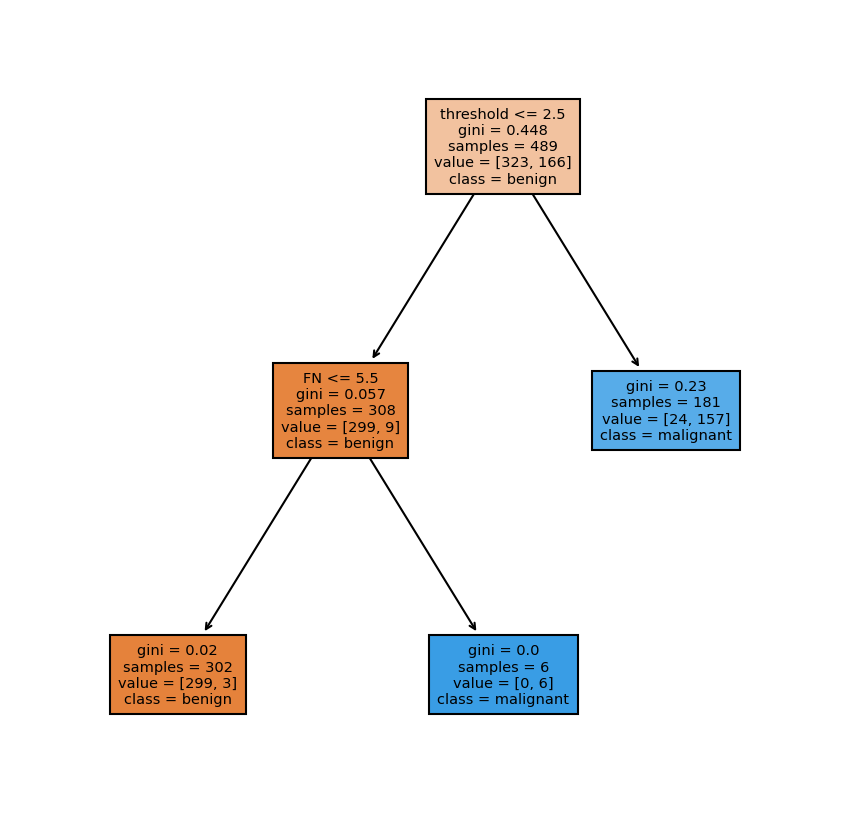

In [20]:
fig = plt.figure(figsize=(7,7), dpi=150)
_ = plot_tree(classTree, 
            feature_names=df.columns, 
            class_names=['benign', 'malignant'],
                filled=True,
                fontsize=7
             )

In [21]:
print(f"Accuracy=", accuracy_score(y_train, classTree.predict(X_train)))
print(f"Precision=", precision_score(y_train, classTree.predict(X_train)))
print(f"Recall=", recall_score(y_train, classTree.predict(X_train)))
print(f"f1=", f1_score(y_train, classTree.predict(X_train)))

Accuracy= 0.9447852760736196
Precision= 0.8716577540106952
Recall= 0.9819277108433735
f1= 0.9235127478753541


In [22]:
print(classification_report(y_test, classTree.predict(X_test), target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.98      0.87      0.92       135
   Malignant       0.80      0.97      0.88        75

    accuracy                           0.90       210
   macro avg       0.89      0.92      0.90       210
weighted avg       0.92      0.90      0.91       210



In [23]:
dtree_row = ("D-tree","depth = 4, leaf_nodes = 3", float(recall_score(y_train, classTree.predict(X_train)) ))
model_selection.append(dtree_row)

# Hyper parameter tunning: Decision Tree

In [24]:
#'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 2

score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0,  0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_



recall score:  0.9632352941176471
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 60}


In [25]:
dtreeh = ("D_tree_HPT",str(gridSearch.best_params_), gridSearch.best_score_)
model_selection.append(dtreeh)

# Hyper parameter tuning: K-nn model

In [26]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,27,2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

recall score:  0.9577205882352942
parameters:  {'metric': 'euclidean', 'n_neighbors': 5}


In [27]:
knnh = ('k_nn_HPT', str(gridSearch.best_params_), gridSearch.best_score_)
model_selection.append(knnh)

# Ensemble techniques 

## GradientBoostingClassifier

In [28]:
max_depth = [10]

learning_rate = [0.1, 0.2 ,0.3]

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 1)]

param_gradient = { 
                     'n_estimators' : n_estimators,
                      'learning_rate': learning_rate,
                      'max_depth' : max_depth,
                     }






In [29]:
gboost = GradientBoostingClassifier(random_state=1)
best_random_search_model = RandomizedSearchCV(
        estimator=gboost, 
        param_distributions=param_gradient, 
        n_iter = 2, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train.values.ravel())

In [30]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)
y_pred = best_random_search_model.predict(X_test)

Best parameters found:  {'n_estimators': 1, 'max_depth': 10, 'learning_rate': 0.1}


In [31]:
print(f"{'Gradient Descent Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average ='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average ='weighted',  zero_division=0)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average ='weighted')}")

Gradient Descent Model      Score       
************************************
>> Recall Score:  0.6428571428571429
Accuracy Score:   0.6428571428571429
Precision Score:  0.413265306122449
F1 Score:         0.5031055900621119


In [32]:
gdrow = ("Gradient Descent", str(random_search_best_params), recall_score(y_test, y_pred,average ='weighted'))
model_selection.append(gdrow)

## ADA boost 

In [33]:
aboost = AdaBoostClassifier(random_state=1)



In [34]:
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

n_estimators = [50,100,150,200,250,300,350,400,450,500]

param_gradient = { 
                     'n_estimators' : n_estimators,
                      'learning_rate': learning_rate,
                     }

In [35]:
best_random_search_model_aboost = RandomizedSearchCV(
        estimator=aboost, 
        param_distributions=param_gradient,
        n_iter = 2000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model_aboost.fit(X_train, y_train.values.ravel())

C:\Users\Kavya Reddy Basupall\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 100 is smaller than n_iter=2000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [36]:
random_search_best_params_aboost = best_random_search_model_aboost.best_params_
print('Best parameters found: ', best_random_search_model_aboost)

Best parameters found:  RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]})


In [37]:
y_pred = best_random_search_model_aboost.predict(X_test)

In [38]:
print(f"{'ADA Boost Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred,average ='weighted')}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average ='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average ='weighted')}")

 ADA Boost Model        Score       
************************************
>> Recall Score:  0.9571428571428572
Accuracy Score:   0.9571428571428572
Precision Score:  0.9579170829170829
F1 Score:         0.9573222547445946


In [39]:
xgbrow = ("ADA Boost", str(best_random_search_model_aboost), recall_score(y_test, y_pred,average ='weighted'))
model_selection.append(xgbrow)

# LogisticRegression

In [40]:
logClassifier=LogisticRegression(random_state=1) 
_ = logClassifier.fit(X_train,y_train)

In [41]:
y_pred = logClassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

[[129   6]
 [  4  71]]
***********************
Recall Score:     0.947
***********************
Accuracy Score:   0.952
Precision Score:  0.922
F1 Score:         0.934
***********************


In [42]:
lrrow = ("Logistic Regression", '',recall_score(y_test, y_pred))
model_selection.append(lrrow)

# ANN (artificial Neural Network)

In [43]:
hidden_layor_2=  tuple(range(480, 20, -50))
max_iter  =400 

In [44]:
%%time
%%capture --no-display

ann_2 = MLPClassifier(hidden_layer_sizes= hidden_layor_2, solver='adam', max_iter=max_iter)
_ = ann_2.fit(X_train, y_train)

CPU times: total: 28.3 s
Wall time: 13.9 s


In [45]:
%%time

y_pred = ann_2.predict(X_test)

CPU times: total: 125 ms
Wall time: 29.3 ms


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       135
           1       0.93      0.93      0.93        75

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



In [47]:
Recall_ann = recall_score(y_test, y_pred)

annrow = ("ANN", f"hidden layors: {', '.join(str(hidden_layor_2))}", Recall_ann)
model_selection.append(annrow)

## Comparing all Models 

In [48]:
all_models = pd.DataFrame(model_selection, columns= ['model_name', 'description', 'recall_score'])
all_models

,model_name,description,recall_score
0,K-nn,"k=5, threshold = 0.05",0.986667
1,D-tree,"depth = 4, leaf_nodes = 3",0.981928
2,D_tree_HPT,"{'max_depth': 5, 'min_impurity_decrease': 0, '...",0.963235
3,k_nn_HPT,"{'metric': 'euclidean', 'n_neighbors': 5}",0.957721
4,Gradient Descent,"{'n_estimators': 1, 'max_depth': 10, 'learning...",0.642857
5,ADA Boost,"RandomizedSearchCV(cv=10, estimator=AdaBoostCl...",0.957143
6,Logistic Regression,,0.946667
7,ANN,"hidden layors: (, 4, 8, 0, ,, , 4, 3, 0, ,, ...",0.933333


# plot all scores of all models implemented

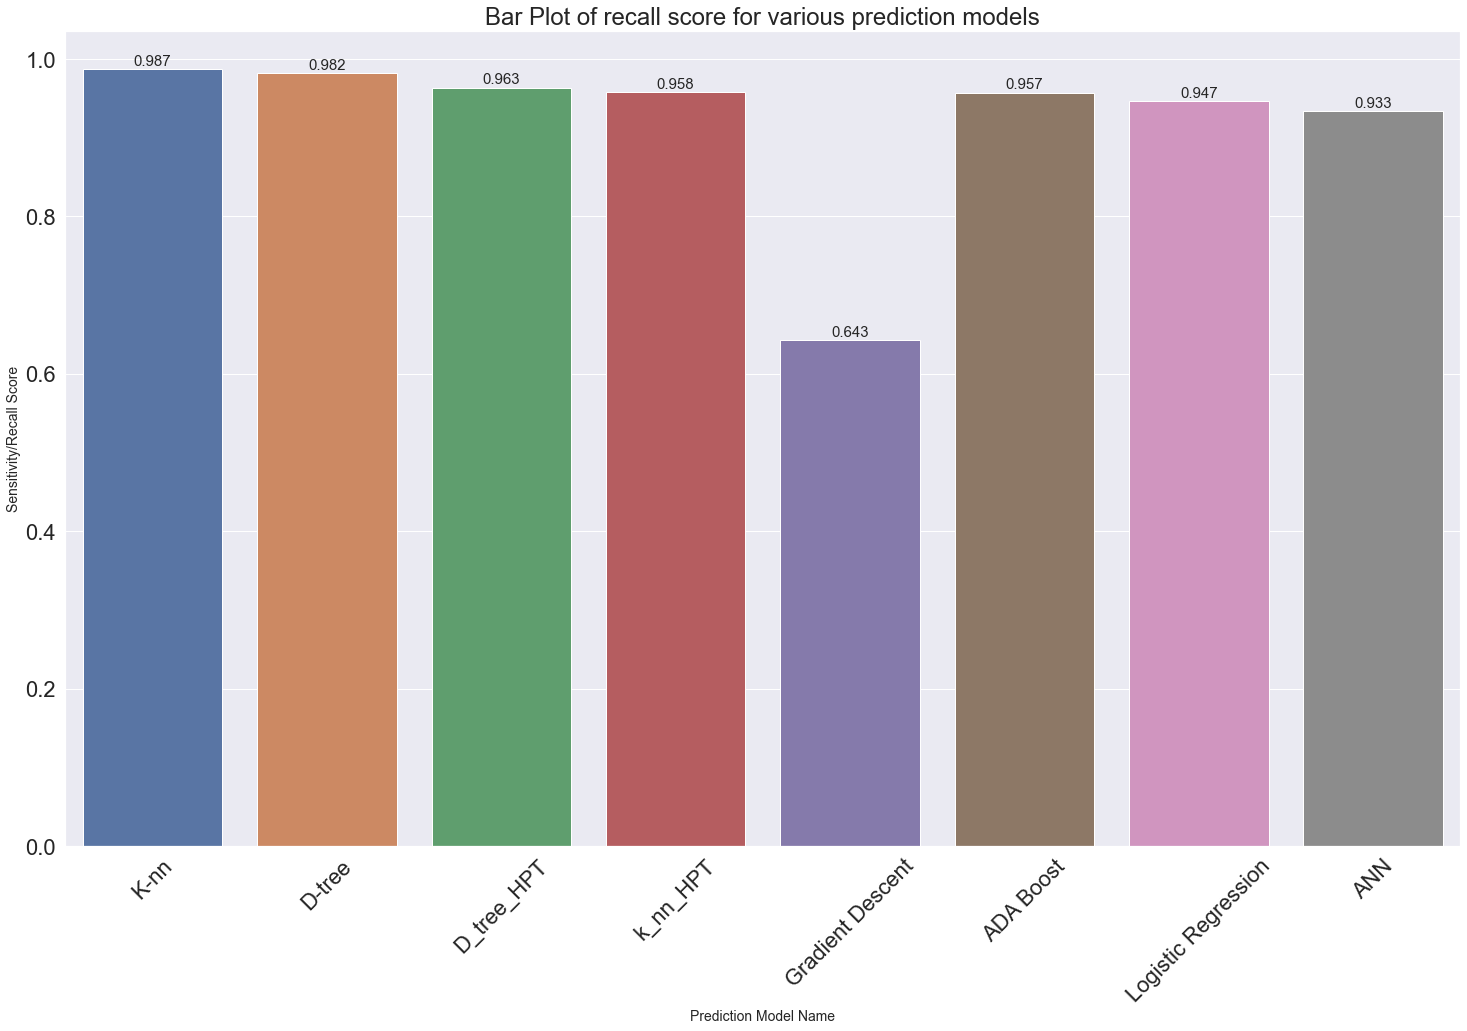

<Figure size 432x288 with 0 Axes>

In [49]:
df1 = all_models.filter(items= ['model_name', 'recall_score'])

fig = plt.figure(figsize = (25, 15))



sns.set_style('darkgrid')
sns.set(font_scale=2)

plots = sns.barplot(x="model_name", y= "recall_score", data=df1)
plots.set_xticklabels(plots.get_xticklabels(), rotation=45)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2 ,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Prediction Model Name", size=14)
 
# Setting the label for y-axis
plt.ylabel("Sensitivity/Recall Score", size=14)
 
# Setting the title for the graph
plt.title("Bar Plot of recall score for various prediction models")
 
# Finally showing the plot
plt.show()

## Save Model Selection graph
plt.savefig('model_selection.png')

# Analysis:

1.We have fitted various Machine learning models, applied performance tunning and tried Ensemble techniques. also Neural networks to the sampled clinical trial Breast cancer data and plotted the performance metrics (Recall) for all the models.

2. From the above analysis, we have decided that Recall is our best and deciding metric for model selection. 

3. Therefore, from the above bar graph, we can compare the Recall scores and chose the best model which is the K-nn model or logistic regression model is the best fitting model for our breast cancer data.

Below are our best models, their best parameters and best Recall score 

In [50]:
best_model = all_models[all_models['model_name'].isin(['K-nn'])]
best_model

,model_name,description,recall_score
0,K-nn,"k=5, threshold = 0.05",0.986667
